# Comparing two cities - Analysis
------

#### In this notebook I will go through the analysis that was done to segment and compare the two cities

#### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import StandardScaler
import json 
from geopy.geocoders import Nominatim
import requests 
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium 
!pip install uszipcode
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)
print('Libraries imported.')

     |████████████████████████████████| 143kB 3.2MB/s eta 0:00:01
     |████████████████████████████████| 204kB 37.1MB/s eta 0:00:01
     |████████████████████████████████| 122kB 39.1MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/7e/f5/4b/c19e6276126325eb8071b273347c05a830c37a82b9b3b81510
Successfully built autopep8
Start downloading data for simple zipcode database, total size 9MB ...
  1 MB finished ...
  2 MB finished ...
  3 MB finished ...
  4 MB finished ...
  5 MB finished ...
  6 MB finished ...
  7 MB finished ...
  8 MB finished ...
  9 MB finished ...
  10 MB finished ...
  Complete!
Libraries imported.


In [2]:
# @hidden cell
CLIENT_ID = 'WAEIGRQUBSFOT142ZC3HFVLP5HICCTJRNOU1JMFFEKJJA1LS' # your Foursquare ID
CLIENT_SECRET = 'QMSNDAXRU51AMAIPGGMYCXMH4U2KH1BOSOQ3YWSQTWH2MTA4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#### Capture and Expore the data for St. Louis and Dallas

In [3]:
# Capture the zip codes for St. Louis, MO and explore the data
stl_resp = search.by_city_and_state("saint louis", "mo", returns=150)
zip_stl = stl_resp[40]
zip_stl.to_dict()

{'zipcode': '63141',
 'zipcode_type': 'Standard',
 'major_city': 'Saint Louis',
 'post_office_city': 'Saint Louis, MO',
 'common_city_list': ['Saint Louis', 'Creve Coeur'],
 'county': 'St. Louis County',
 'state': 'MO',
 'lat': 38.65,
 'lng': -90.45,
 'timezone': 'Central',
 'radius_in_miles': 4.0,
 'area_code_list': ['636', '314'],
 'population': 20593,
 'population_density': 1457.0,
 'land_area_in_sqmi': 14.13,
 'water_area_in_sqmi': 0.0,
 'housing_units': 9040,
 'occupied_housing_units': 8322,
 'median_home_value': 373700,
 'median_household_income': 102708,
 'bounds_west': -90.513914,
 'bounds_east': -90.394219,
 'bounds_north': 38.683068,
 'bounds_south': 38.62755}

In [4]:
feature_col = ["zipcode", "common_city_list", "lat", "lng", "radius_in_miles", "population", "population_density", "median_home_value", "median_household_income"]
zip_stl = [zip.to_dict() for zip in stl_resp]
df_stl = pd.DataFrame(data=zip_stl).dropna()
df_stl = df_stl[feature_col]
# getting the common city name
df_stl["common_city_list"] = [i[1] if len(i)>1 else i[0] for i in df_stl["common_city_list"]] 
print(df_stl.shape)
df_stl.head()

(45, 9)


,zipcode,common_city_list,lat,lng,radius_in_miles,population,population_density,median_home_value,median_household_income
0,63101,Saint Louis,38.631,-90.193,0.568182,2620,6947.0,237100.0,54417.0
1,63102,Saint Louis,38.640,-90.190,2.000000,2316,1552.0,194200.0,54018.0
2,63103,Saint Louis,38.630,-90.220,1.000000,6900,3196.0,178300.0,34719.0
3,63104,Saint Louis,38.610,-90.220,2.000000,18656,5399.0,192700.0,45498.0
4,63105,Clayton,38.650,-90.320,2.000000,17667,6647.0,559500.0,86031.0


In [5]:
# Capture the zip codes for Dallas, TX and explore the data
dal_resp = search.by_city_and_state("dallas", "tx", returns=150)
zip_dal = dal_resp[40]
zip_dal.to_dict()

{'zipcode': '75245',
 'zipcode_type': 'Standard',
 'major_city': 'Dallas',
 'post_office_city': None,
 'common_city_list': ['Dallas'],
 'county': 'Dallas County',
 'state': 'TX',
 'lat': None,
 'lng': None,
 'timezone': None,
 'radius_in_miles': None,
 'area_code_list': ['214'],
 'population': None,
 'population_density': None,
 'land_area_in_sqmi': None,
 'water_area_in_sqmi': None,
 'housing_units': None,
 'occupied_housing_units': None,
 'median_home_value': None,
 'median_household_income': None,
 'bounds_west': None,
 'bounds_east': None,
 'bounds_north': None,
 'bounds_south': None}

In [6]:
zip_dal = [zip.to_dict() for zip in dal_resp]
df_dal = pd.DataFrame(data=zip_dal).dropna()
df_dal = df_dal[feature_col]
# getting the common city name
df_dal["common_city_list"] = [i[1] if len(i)>1 else i[0] for i in df_dal["common_city_list"]] 
print(df_dal.shape)
df_dal.tail()

(45, 9)


,zipcode,common_city_list,lat,lng,radius_in_miles,population,population_density,median_home_value,median_household_income
44,75249,Dallas,32.64,-96.97,2.0,13373.0,2909.0,117700.0,57247.0
46,75252,Dallas,33.00,-96.79,2.0,24112.0,4778.0,280300.0,54650.0
47,75253,Dallas,32.67,-96.61,4.0,18450.0,1365.0,48200.0,33283.0
48,75254,Dallas,32.95,-96.80,2.0,23253.0,7006.0,294800.0,44283.0
52,75287,Dallas,33.00,-96.84,2.0,49004.0,8754.0,246400.0,46828.0


#### Visualizing the Postal Codes on the maps

St. Louis, MO zip code map

In [7]:
stl_latitude = stl_resp[16].lat
stl_longitude = stl_resp[16].lng
map_stl = folium.Map(location=[stl_latitude, stl_longitude], zoom_start=11)

# add markers to map
for lat, lng, common_city_list, zipcode in zip(df_stl['lat'], df_stl['lng'], df_stl['common_city_list'], df_stl['zipcode']):
    label = '{}, {}'.format(common_city_list, zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_stl) 


map_stl

Dallas, TX zip code map

In [8]:
dal_latitude = dal_resp[0].lat
dal_longitude = dal_resp[0].lng
map_dal = folium.Map(location=[dal_latitude, dal_longitude], zoom_start=11)

# add markers to map
for lat, lng, common_city_list, zipcode in zip(df_dal['lat'], df_dal['lng'], df_dal['common_city_list'], df_dal['zipcode']):
    label = '{}, {}'.format(common_city_list, zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dal) 


map_dal

## Getting the lists of restaurants near all the zip codes

#### Creating the functions needed get the nearby restaurants and extracting the category of each restaurant

In [9]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [10]:
# function gets all the Near by Restaurants
categoryId = '4d4b7105d754a06374d81259' # The category id for restaurants
def getNearbyVenues(postcodes, latitudes, longitudes, radius=3219, LIMIT=200):
    venues_list=[]
    for postcode, lat, lng in zip(postcodes, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            categoryId,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        print(postcode, " - ", len(results))
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            postcode, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['zipcode', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Get the restaurants for each zip code and merge into one dataset

In [11]:
# Get the list of restaurants for both cities
all_venues = getNearbyVenues(postcodes=df_stl['zipcode'],
                                   latitudes=df_stl['lat'],
                                   longitudes=df_stl['lng']
                                  )

all_venues = all_venues.append(getNearbyVenues(postcodes=df_dal['zipcode'],
                                   latitudes=df_dal['lat'],
                                   longitudes=df_dal['lng']
                                  ))

63101  -  100
63102  -  84
63103  -  100
63104  -  100
63105  -  100
63106  -  100
63107  -  35
63108  -  100
63109  -  90
63110  -  100
63111  -  90
63112  -  100
63113  -  100
63114  -  89
63115  -  46
63116  -  100
63117  -  100
63118  -  98
63119  -  100
63120  -  47
63121  -  41
63122  -  97
63123  -  57
63124  -  44
63125  -  63
63126  -  68
63127  -  53
63128  -  27
63129  -  26
63130  -  100
63131  -  71
63132  -  80
63133  -  82
63134  -  64
63135  -  50
63136  -  52
63137  -  22
63138  -  2
63139  -  100
63140  -  57
63141  -  61
63143  -  100
63144  -  100
63146  -  55
63147  -  33
75201  -  100
75202  -  100
75203  -  20
75204  -  100
75205  -  100
75206  -  100
75208  -  100
75209  -  100
75210  -  28
75211  -  18
75212  -  57
75214  -  83
75215  -  39
75216  -  21
75217  -  12
75218  -  83
75219  -  100
75220  -  100
75223  -  91
75224  -  76
75225  -  100
75226  -  100
75227  -  68
75228  -  78
75229  -  95
75230  -  100
75231  -  100
75232  -  47
75233  -  78
75234  -  

## Exploring and Analyzing the restaurant data

In [12]:
print(all_venues.shape)
all_venues.tail()

(6652, 7)


,zipcode,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3363,75287,33.0,-96.84,Dickey's Barbecue Pit,33.025397,-96.846218,BBQ Joint
3364,75287,33.0,-96.84,Papa John's Pizza,32.999467,-96.825826,Pizza Place
3365,75287,33.0,-96.84,Burger King,33.001843,-96.857385,Fast Food Restaurant
3366,75287,33.0,-96.84,AwShucks,33.027237,-96.841570,Seafood Restaurant
3367,75287,33.0,-96.84,Taco Cabana,33.025270,-96.845552,Taco Place


#### One hot encode the Category data

In [13]:
# one hot encoding
all_onehot = pd.get_dummies(all_venues[['Venue Category']], prefix="", prefix_sep="")

# add Postcode column back to dataframe
all_onehot['zipcode'] = all_venues['zipcode'] 

# move Postcode column to the first column
fixed_columns = [all_onehot.columns[-1]] + list(all_onehot.columns[:-1])
all_onehot = all_onehot[fixed_columns]

print(all_onehot.shape)

(6652, 87)


#### Group by zip codes and get the mean of the restaurant count

In [14]:
all_grouped = all_onehot.groupby("zipcode").mean().reset_index()
all_grouped.head()

,zipcode,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Bosnian Restaurant,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Churrascaria,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fondue Restaurant,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Persian Restaurant,Peruvian Restaurant,Pet Café,Pizza Place,Poke Place,Ramen Restaurant,Restaurant,Salad Place,Salvadoran Restaurant,Sandwich Place,Seafood Restaurant,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,63101,0.0,0.120000,0.010000,0.0,0.040000,0.0,0.040000,0.00,0.0,0.00,0.030000,0.0,0.010000,0.0,0.0,0.02000,0.0,0.0,0.01000,0.0,0.0,0.0,0.010000,0.01000,0.0,0.02000,0.020000,0.0,0.00,0.01,0.02000,0.00,0.000000,0.00,0.01000,0.0,0.0,0.070000,0.010000,0.00,0.00,0.010000,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.060000,0.01,0.00,0.00,0.030000,0.050000,0.00,0.0,0.030000,0.00,0.0,0.010000,0.0,0.060000,0.0,0.0,0.080000,0.00,0.0,0.070000,0.00,0.010000,0.010000,0.010000,0.060000,0.02000,0.010000,0.0,0.00,0.0,0.010000,0.0,0.0,0.0,0.00,0.00,0.0
1,63102,0.0,0.119048,0.011905,0.0,0.035714,0.0,0.011905,0.00,0.0,0.00,0.035714,0.0,0.011905,0.0,0.0,0.02381,0.0,0.0,0.02381,0.0,0.0,0.0,0.011905,0.02381,0.0,0.02381,0.011905,0.0,0.00,0.00,0.02381,0.00,0.011905,0.00,0.02381,0.0,0.0,0.071429,0.011905,0.00,0.00,0.011905,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.071429,0.00,0.00,0.00,0.035714,0.035714,0.00,0.0,0.047619,0.00,0.0,0.011905,0.0,0.047619,0.0,0.0,0.047619,0.00,0.0,0.047619,0.00,0.011905,0.011905,0.011905,0.071429,0.02381,0.011905,0.0,0.00,0.0,0.011905,0.0,0.0,0.0,0.00,0.00,0.0
2,63103,0.0,0.120000,0.000000,0.0,0.040000,0.0,0.000000,0.00,0.0,0.00,0.040000,0.0,0.010000,0.0,0.0,0.04000,0.0,0.0,0.02000,0.0,0.0,0.0,0.000000,0.01000,0.0,0.02000,0.020000,0.0,0.00,0.00,0.04000,0.00,0.000000,0.00,0.00000,0.0,0.0,0.060000,0.010000,0.01,0.01,0.000000,0.00,0.0,0.0,0.01,0.0,0.01,0.00,0.050000,0.01,0.00,0.01,0.030000,0.050000,0.00,0.0,0.060000,0.00,0.0,0.010000,0.0,0.060000,0.0,0.0,0.050000,0.00,0.0,0.070000,0.01,0.000000,0.000000,0.040000,0.040000,0.03000,0.000000,0.0,0.00,0.0,0.010000,0.0,0.0,0.0,0.00,0.00,0.0
3,63104,0.0,0.060000,0.020000,0.0,0.060000,0.0,0.070000,0.01,0.0,0.01,0.060000,0.0,0.000000,0.0,0.0,0.04000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.02000,0.020000,0.0,0.01,0.00,0.00000,0.01,0.000000,0.00,0.00000,0.0,0.0,0.050000,0.010000,0.02,0.00,0.000000,0.00,0.0,0.0,0.01,0.0,0.00,0.01,0.030000,0.02,0.00,0.01,0.020000,0.040000,0.01,0.0,0.030000,0.01,0.0,0.000000,0.0,0.100000,0.0,0.0,0.060000,0.00,0.0,0.060000,0.01,0.000000,0.000000,0.010000,0.010000,0.01000,0.010000,0.0,0.00,0.0,0.020000,0.0,0.0,0.0,0.02,0.03,0.0
4,63105,0.0,0.080000,0.010000,0.0,0.020000,0.0,0.050000,0.01,0.0,0.00,0.030000,0.0,0.030000,0.0,0.0,0.01000,0.0,0.0,0.04000,0.0,0.0,0.0,0.000000,0.02000,0.0,0.01000,0.010000,0.0,0.00,0.01,0.03000,0.01,0.000000,0.01,0.00000,0.0,0.0,0.000000,0.020000,0.00,0.00,0.000000,0.02,0.0,0.0,0.00,0.0,0.03,0.00,0.110000,0.00,0.01,0.00,0.010000,0.050000,0.01,0.0,0.020000,0.01,0.0,0.000000,0.0,0.060000,0.0,0.0,0.030000,0.01,0.0,0.050000,0.02,0.0

#### Find the top 10 venues for each zip code

In [15]:
# Function to sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [16]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['zipcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
zipcode_venues_sorted = pd.DataFrame(columns=columns)
zipcode_venues_sorted['zipcode'] = all_grouped['zipcode']

for ind in np.arange(all_grouped.shape[0]):
    zipcode_venues_sorted.iloc[ind, 1:] = return_most_common_venues(all_grouped.iloc[ind, :], num_top_venues)

zipcode_venues_sorted.head()

,zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,63101,American Restaurant,Restaurant,Sandwich Place,Food Truck,Italian Restaurant,Pizza Place,Steakhouse,Mexican Restaurant,BBQ Joint,Bakery
1,63102,American Restaurant,Italian Restaurant,Food Truck,Steakhouse,Sandwich Place,New American Restaurant,Pizza Place,Restaurant,Breakfast Spot,BBQ Joint
2,63103,American Restaurant,Sandwich Place,New American Restaurant,Pizza Place,Food Truck,Italian Restaurant,Mexican Restaurant,Restaurant,Steakhouse,Café
3,63104,Pizza Place,Bakery,Restaurant,American Restaurant,Breakfast Spot,BBQ Joint,Sandwich Place,Food Truck,Mexican Restaurant,Café
4,63105,Italian Restaurant,American Restaurant,Pizza Place,Mexican Restaurant,Sandwich Place,Bakery,Thai Restaurant,Chinese Restaurant,Sushi Restaurant,Burger Joint


## Find similar zip codes by clustering the data

#### Add the additional features to the data: population density and median household income

In [17]:
# add additional feature columns
add_features = ['zipcode','population_density','median_household_income']
all_grouped_features = pd.concat([df_stl[add_features], df_dal[add_features]], ignore_index=True)
all_grouped_features = pd.merge(all_grouped_features, all_grouped, on='zipcode', how='inner')
all_grouped_features.head()

,zipcode,population_density,median_household_income,African Restaurant,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Bosnian Restaurant,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Churrascaria,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fondue Restaurant,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Persian Restaurant,Peruvian Restaurant,Pet Café,Pizza Place,Poke Place,Ramen Restaurant,Restaurant,Salad Place,Salvadoran Restaurant,Sandwich Place,Seafood Restaurant,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,63101,6947.0,54417.0,0.0,0.120000,0.010000,0.0,0.040000,0.0,0.040000,0.00,0.0,0.00,0.030000,0.0,0.010000,0.0,0.0,0.02000,0.0,0.0,0.01000,0.0,0.0,0.0,0.010000,0.01000,0.0,0.02000,0.020000,0.0,0.00,0.01,0.02000,0.00,0.000000,0.00,0.01000,0.0,0.0,0.070000,0.010000,0.00,0.00,0.010000,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.060000,0.01,0.00,0.00,0.030000,0.050000,0.00,0.0,0.030000,0.00,0.0,0.010000,0.0,0.060000,0.0,0.0,0.080000,0.00,0.0,0.070000,0.00,0.010000,0.010000,0.010000,0.060000,0.02000,0.010000,0.0,0.00,0.0,0.010000,0.0,0.0,0.0,0.00,0.00,0.0
1,63102,1552.0,54018.0,0.0,0.119048,0.011905,0.0,0.035714,0.0,0.011905,0.00,0.0,0.00,0.035714,0.0,0.011905,0.0,0.0,0.02381,0.0,0.0,0.02381,0.0,0.0,0.0,0.011905,0.02381,0.0,0.02381,0.011905,0.0,0.00,0.00,0.02381,0.00,0.011905,0.00,0.02381,0.0,0.0,0.071429,0.011905,0.00,0.00,0.011905,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.071429,0.00,0.00,0.00,0.035714,0.035714,0.00,0.0,0.047619,0.00,0.0,0.011905,0.0,0.047619,0.0,0.0,0.047619,0.00,0.0,0.047619,0.00,0.011905,0.011905,0.011905,0.071429,0.02381,0.011905,0.0,0.00,0.0,0.011905,0.0,0.0,0.0,0.00,0.00,0.0
2,63103,3196.0,34719.0,0.0,0.120000,0.000000,0.0,0.040000,0.0,0.000000,0.00,0.0,0.00,0.040000,0.0,0.010000,0.0,0.0,0.04000,0.0,0.0,0.02000,0.0,0.0,0.0,0.000000,0.01000,0.0,0.02000,0.020000,0.0,0.00,0.00,0.04000,0.00,0.000000,0.00,0.00000,0.0,0.0,0.060000,0.010000,0.01,0.01,0.000000,0.00,0.0,0.0,0.01,0.0,0.01,0.00,0.050000,0.01,0.00,0.01,0.030000,0.050000,0.00,0.0,0.060000,0.00,0.0,0.010000,0.0,0.060000,0.0,0.0,0.050000,0.00,0.0,0.070000,0.01,0.000000,0.000000,0.040000,0.040000,0.03000,0.000000,0.0,0.00,0.0,0.010000,0.0,0.0,0.0,0.00,0.00,0.0
3,63104,5399.0,45498.0,0.0,0.060000,0.020000,0.0,0.060000,0.0,0.070000,0.01,0.0,0.01,0.060000,0.0,0.000000,0.0,0.0,0.04000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.02000,0.020000,0.0,0.01,0.00,0.00000,0.01,0.000000,0.00,0.00000,0.0,0.0,0.050000,0.010000,0.02,0.00,0.000000,0.00,0.0,0.0,0.01,0.0,0.00,0.01,0.030000,0.02,0.00,0.01,0.020000,0.040000,0.01,0.0,0.030000,0.01,0.0,0.000000,0.0,0.100000,0.0,0.0,0.060000,0.00,0.0,0.060000,0.01,0.000000,0.000000,0.010000,0.010000,0.01000,0.010000,0.0,0.00,0.0,0.020000,0.0,0.0,0.0,0.02,0.03,0.0
4,63105,6647.0,86031.0,0.0,0.080000,0.010000,0.0,0.020000,0.0,0.050000,0.01,0.0,0.00,0.030000,0.0,0.030000,0.0,0.0,0.01000,0.0,0.0,0.04000,0.0,0.0,0.0,0.000000,0.02000,0.0,0.01000,0.010000,0.0,0.00,0.01,0.03000,0.01,0.000000,0.01,0.00000,0.0,0.0,0.000000,0.020000,0.00,0.00,0.000000,0.02,0.0,0.0,0.00,0.0,0.03,0.00,0.110000,0.00,0.

In [18]:
# Preprocess the data
all_grouped_cluster = all_grouped.values[:,1:]
all_grouped_cluster = StandardScaler().fit_transform(all_grouped_cluster.astype('float64'))
all_grouped_cluster

array([[-0.21069907,  1.22299195,  0.04115393, ..., -0.55962473,
        -0.61341526, -0.86012075],
       [-0.21069907,  1.20104248,  0.21840091, ..., -0.55962473,
        -0.61341526, -0.86012075],
       [-0.21069907,  1.22299195, -0.8893927 , ..., -0.55962473,
        -0.61341526, -0.86012075],
       ...,
       [-0.21069907,  1.74977927, -0.8893927 , ..., -0.55962473,
        -0.61341526, -0.86012075],
       [-0.21069907,  0.9925225 ,  0.04115393, ..., -0.55962473,
         0.92049683,  2.35645157],
       [-0.21069907, -0.39029423,  1.90224718, ..., -0.55962473,
         0.15354079,  0.74816541]])

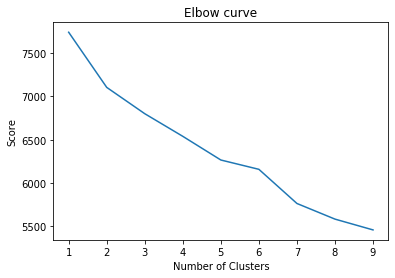

In [19]:
# set number of clusters
kclusters = range(1,10)
score = []

for i in kclusters:
    kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++').fit(all_grouped_cluster)
    score.append(kmeans.inertia_)

plt.plot(kclusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow curve')
plt.show()


# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:30] 

#### There is a slight elbow at 6 clusters

In [20]:
# Run KMeans one more time with 6 clusters
kclusters = 6
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_grouped_cluster)

### Combine and visualize the all the data

In [21]:
# If the columns already exists drop and readd
if 'Cluster Labels' in zipcode_venues_sorted.columns:
    zipcode_venues_sorted.drop('Cluster Labels', axis=1, inplace=True)
    zipcode_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
else:
    zipcode_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
        
all_merged = pd.concat([df_stl, df_dal])

# merge the original data with the label and new top 10 data
all_merged = all_merged.join(zipcode_venues_sorted.set_index('zipcode'), on='zipcode')

all_merged.head(10)

,zipcode,common_city_list,lat,lng,radius_in_miles,population,population_density,median_home_value,median_household_income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,63101,Saint Louis,38.631,-90.193,0.568182,2620.0,6947.0,237100.0,54417.0,2,American Restaurant,Restaurant,Sandwich Place,Food Truck,Italian Restaurant,Pizza Place,Steakhouse,Mexican Restaurant,BBQ Joint,Bakery
1,63102,Saint Louis,38.640,-90.190,2.000000,2316.0,1552.0,194200.0,54018.0,2,American Restaurant,Italian Restaurant,Food Truck,Steakhouse,Sandwich Place,New American Restaurant,Pizza Place,Restaurant,Breakfast Spot,BBQ Joint
2,63103,Saint Louis,38.630,-90.220,1.000000,6900.0,3196.0,178300.0,34719.0,2,American Restaurant,Sandwich Place,New American Restaurant,Pizza Place,Food Truck,Italian Restaurant,Mexican Restaurant,Restaurant,Steakhouse,Café
3,63104,Saint Louis,38.610,-90.220,2.000000,18656.0,5399.0,192700.0,45498.0,5,Pizza Place,Bakery,Restaurant,American Restaurant,Breakfast Spot,BBQ Joint,Sandwich Place,Food Truck,Mexican Restaurant,Café
4,63105,Clayton,38.650,-90.320,2.000000,17667.0,6647.0,559500.0,86031.0,3,Italian Restaurant,American Restaurant,Pizza Place,Mexican Restaurant,Sandwich Place,Bakery,Thai Restaurant,Chinese Restaurant,Sushi Restaurant,Burger Joint
5,63106,Saint Louis,38.640,-90.210,2.000000,11883.0,5267.0,89400.0,15126.0,2,American Restaurant,Sandwich Place,Pizza Place,Italian Restaurant,Fast Food Restaurant,Food Truck,Mexican Restaurant,New American Restaurant,Chinese Restaurant,Steakhouse
6,63107,Saint Louis,38.670,-90.210,1.000000,11912.0,4962.0,68900.0,23276.0,0,Chinese Restaurant,Fast Food Restaurant,Diner,Sandwich Place,Fried Chicken Joint,American Restaurant,Café,Pizza Place,Food,Bakery
7,63108,Saint Louis,38.650,-90.250,2.000000,21568.0,9627.0,265000.0,30157.0,5,Fast Food Restaurant,American Restaurant,Sandwich Place,New American Restaurant,Pizza Place,Chinese Restaurant,Café,Sushi Restaurant,Southern / Soul Food Restaurant,Fried Chicken Joint
8,63109,Saint Louis,38.580,-90.300,2.000000,26946.0,7546.0,163400.0,51951.0,1,Pizza Place,Mexican Restaurant,Sandwich Place,Chinese Restaurant,BBQ Joint,Italian Restaurant,Greek Restaurant,Bakery,American Restaurant,Deli / Bodega
9,63110,Saint Louis,38.630,-90.270,2.000000,17107.0,2732.0,158600.0,38036.0,5,Italian Restaurant,American Restaurant,Sandwich Place,Pizza Place,New American Restaurant,Bakery,Café,Burger Joint,Deli / Bodega,Sushi Restaurant


#### St. Louis Map

In [22]:
# create map
stl_latitude = stl_resp[16].lat
stl_longitude = stl_resp[16].lng
map_stl = folium.Map(location=[stl_latitude, stl_longitude], zoom_start=10.5)

# Pull out ONLY the St. Louis data
stl_merged = all_merged[all_merged.zipcode.str.contains('^6', regex=True)]

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(stl_merged['lat'], stl_merged['lng'], stl_merged['zipcode'], stl_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_stl)
       
map_stl

#### Dallas Map

In [23]:
# create map
dal_latitude = dal_resp[0].lat
dal_longitude = dal_resp[0].lng
map_dal = folium.Map(location=[dal_latitude, dal_longitude], zoom_start=10.5)

# Pull out ONLY the St. Louis data
dal_merged = all_merged[all_merged.zipcode.str.contains('^7', regex=True)]

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dal_merged['lat'], dal_merged['lng'], dal_merged['zipcode'], dal_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_dal)
       
map_dal

## Examine Clusters

#### Cluster 0

In [24]:
all_merged.loc[all_merged['Cluster Labels'] == 0, all_merged.columns[[1] + list(range(5, all_merged.shape[1]))]]

,common_city_list,population,population_density,median_home_value,median_household_income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Saint Louis,11912.0,4962.0,68900.0,23276.0,0,Chinese Restaurant,Fast Food Restaurant,Diner,Sandwich Place,Fried Chicken Joint,American Restaurant,Café,Pizza Place,Food,Bakery
14,Saint Louis,20775.0,4866.0,63300.0,26183.0,0,Fast Food Restaurant,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Pizza Place,American Restaurant,Diner,Snack Place,Food Court,Food
19,Saint Louis,10296.0,4260.0,52800.0,23996.0,0,Fast Food Restaurant,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Snack Place,American Restaurant,Diner,Pizza Place,BBQ Joint,Food
44,Saint Louis,11373.0,1937.0,72700.0,29816.0,0,Chinese Restaurant,Fast Food Restaurant,Food,Fried Chicken Joint,Sandwich Place,American Restaurant,Pizza Place,Truck Stop,Diner,Bakery
2,Dallas,15721.0,3324.0,65600.0,28602.0,0,Mexican Restaurant,BBQ Joint,Fried Chicken Joint,Fast Food Restaurant,Sandwich Place,Seafood Restaurant,Breakfast Spot,Deli / Bodega,Southern / Soul Food Restaurant,Chinese Restaurant
10,Dallas,73146.0,4151.0,87800.0,36704.0,0,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Food,Wings Joint,Donut Shop,Fried Chicken Joint,Deli / Bodega,BBQ Joint,Taco Place
11,Dallas,24884.0,2418.0,73700.0,28802.0,0,Fast Food Restaurant,Mexican Restaurant,Pizza Place,Chinese Restaurant,Donut Shop,Fried Chicken Joint,Sandwich Place,BBQ Joint,American Restaurant,Taco Place
13,Dallas,14648.0,1741.0,56300.0,23433.0,0,Mexican Restaurant,Food,American Restaurant,Fried Chicken Joint,Pizza Place,Seafood Restaurant,Southern / Soul Food Restaurant,Fast Food Restaurant,BBQ Joint,Sandwich Place
14,Dallas,49416.0,3379.0,59700.0,23294.0,0,Fried Chicken Joint,Pizza Place,Fast Food Restaurant,BBQ Joint,Sandwich Place,Seafood Restaurant,Deli / Bodega,Breakfast Spot,Burger Joint,Food Truck
15,Dallas,80324.0,2940.0,73200.0,34480.0,0,Fast Food Restaurant,Fried Chicken Joint,Mexican Restaurant,American Restaurant,Diner,Fish & Chips Shop,Wings Joint,Deli / Bodega,Dim Sum Restaurant,Donut Shop


#### Cluster 1

In [25]:
all_merged.loc[all_merged['Cluster Labels'] == 1, all_merged.columns[[1] + list(range(5, all_merged.shape[1]))]]

,common_city_list,population,population_density,median_home_value,median_household_income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Saint Louis,26946.0,7546.0,163400.0,51951.0,1,Pizza Place,Mexican Restaurant,Sandwich Place,Chinese Restaurant,BBQ Joint,Italian Restaurant,Greek Restaurant,Bakery,American Restaurant,Deli / Bodega
10,Saint Louis,20313.0,6275.0,90900.0,30334.0,1,Mexican Restaurant,Chinese Restaurant,Bakery,Pizza Place,Fast Food Restaurant,Fried Chicken Joint,Vietnamese Restaurant,American Restaurant,Café,Sandwich Place
13,Breckenridge Hills,36201.0,4105.0,92800.0,41771.0,1,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Chinese Restaurant,Sandwich Place,American Restaurant,Fried Chicken Joint,Café,Deli / Bodega,Indian Restaurant
18,Webster Groves,33969.0,4048.0,216200.0,68348.0,1,Pizza Place,Sandwich Place,Mexican Restaurant,New American Restaurant,American Restaurant,Fried Chicken Joint,Chinese Restaurant,Italian Restaurant,Deli / Bodega,Asian Restaurant
20,Normandy,26602.0,3705.0,80500.0,33704.0,1,Fast Food Restaurant,Chinese Restaurant,Sandwich Place,Pizza Place,Food,Diner,Café,Fried Chicken Joint,American Restaurant,BBQ Joint
21,Kirkwood,38495.0,2719.0,255400.0,80682.0,1,Fast Food Restaurant,Sandwich Place,Pizza Place,American Restaurant,Bakery,Restaurant,Mexican Restaurant,Steakhouse,Chinese Restaurant,Burger Joint
22,Affton,49308.0,3927.0,147400.0,52877.0,1,Pizza Place,Fast Food Restaurant,Sandwich Place,Bakery,Chinese Restaurant,Deli / Bodega,Restaurant,Mexican Restaurant,Food,Greek Restaurant
23,Clayton,10417.0,1190.0,656800.0,118816.0,1,American Restaurant,Italian Restaurant,Café,Chinese Restaurant,Pizza Place,Bakery,Snack Place,Mexican Restaurant,Sandwich Place,Breakfast Spot
24,Lemay,32201.0,3242.0,123800.0,44458.0,1,Pizza Place,Fast Food Restaurant,American Restaurant,Sandwich Place,Bakery,Chinese Restaurant,Fried Chicken Joint,Mexican Restaurant,Donut Shop,Breakfast Spot
25,Sappington,15112.0,3253.0,185800.0,64436.0,1,Fast Food Restaurant,Sandwich Place,Pizza Place,American Restaurant,Steakhouse,Chinese Restaurant,Breakfast Spot,Italian Restaurant,Restaurant,Mexican Restaurant


#### Cluster 2

In [26]:
all_merged.loc[all_merged['Cluster Labels'] == 2, all_merged.columns[[1] + list(range(5, all_merged.shape[1]))]]

,common_city_list,population,population_density,median_home_value,median_household_income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Saint Louis,2620.0,6947.0,237100.0,54417.0,2,American Restaurant,Restaurant,Sandwich Place,Food Truck,Italian Restaurant,Pizza Place,Steakhouse,Mexican Restaurant,BBQ Joint,Bakery
1,Saint Louis,2316.0,1552.0,194200.0,54018.0,2,American Restaurant,Italian Restaurant,Food Truck,Steakhouse,Sandwich Place,New American Restaurant,Pizza Place,Restaurant,Breakfast Spot,BBQ Joint
2,Saint Louis,6900.0,3196.0,178300.0,34719.0,2,American Restaurant,Sandwich Place,New American Restaurant,Pizza Place,Food Truck,Italian Restaurant,Mexican Restaurant,Restaurant,Steakhouse,Café
5,Saint Louis,11883.0,5267.0,89400.0,15126.0,2,American Restaurant,Sandwich Place,Pizza Place,Italian Restaurant,Fast Food Restaurant,Food Truck,Mexican Restaurant,New American Restaurant,Chinese Restaurant,Steakhouse


#### Cluster 3

In [27]:
all_merged.loc[all_merged['Cluster Labels'] == 3, all_merged.columns[[1] + list(range(5, all_merged.shape[1]))]]

,common_city_list,population,population_density,median_home_value,median_household_income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Clayton,17667.0,6647.0,559500.0,86031.0,3,Italian Restaurant,American Restaurant,Pizza Place,Mexican Restaurant,Sandwich Place,Bakery,Thai Restaurant,Chinese Restaurant,Sushi Restaurant,Burger Joint
11,Saint Louis,20368.0,6157.0,138200.0,27383.0,3,American Restaurant,Sandwich Place,Pizza Place,Fast Food Restaurant,Thai Restaurant,Bakery,Indian Restaurant,Café,Italian Restaurant,Chinese Restaurant
29,University City,30084.0,5973.0,209200.0,55976.0,3,Italian Restaurant,Pizza Place,American Restaurant,Chinese Restaurant,Thai Restaurant,Sandwich Place,Steakhouse,Mexican Restaurant,Indian Restaurant,Taco Place
32,Saint Louis,8161.0,2733.0,62100.0,25239.0,3,Chinese Restaurant,Fast Food Restaurant,Sandwich Place,American Restaurant,Pizza Place,Thai Restaurant,Wings Joint,Bakery,Fried Chicken Joint,Indian Restaurant


#### Cluster 4

In [28]:
all_merged.loc[all_merged['Cluster Labels'] == 4, all_merged.columns[[1] + list(range(5, all_merged.shape[1]))]]

,common_city_list,population,population_density,median_home_value,median_household_income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Dallas,7482.0,3316.0,54900.0,15258.0,4,American Restaurant,Fried Chicken Joint,Fast Food Restaurant,Southern / Soul Food Restaurant,German Restaurant,Food,Hot Dog Joint,Chinese Restaurant,Restaurant,Café


#### Cluster 5

In [30]:
all_merged.loc[all_merged['Cluster Labels'] == 5, all_merged.columns[[1] + list(range(5, all_merged.shape[1]))]]

,common_city_list,population,population_density,median_home_value,median_household_income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Saint Louis,18656.0,5399.0,192700.0,45498.0,5,Pizza Place,Bakery,Restaurant,American Restaurant,Breakfast Spot,BBQ Joint,Sandwich Place,Food Truck,Mexican Restaurant,Café
7,Saint Louis,21568.0,9627.0,265000.0,30157.0,5,Fast Food Restaurant,American Restaurant,Sandwich Place,New American Restaurant,Pizza Place,Chinese Restaurant,Café,Sushi Restaurant,Southern / Soul Food Restaurant,Fried Chicken Joint
9,Saint Louis,17107.0,2732.0,158600.0,38036.0,5,Italian Restaurant,American Restaurant,Sandwich Place,Pizza Place,New American Restaurant,Bakery,Café,Burger Joint,Deli / Bodega,Sushi Restaurant
12,Saint Louis,13167.0,5187.0,66600.0,24561.0,5,Fast Food Restaurant,Sandwich Place,Chinese Restaurant,Pizza Place,American Restaurant,New American Restaurant,Café,Fried Chicken Joint,Gastropub,Mexican Restaurant
15,Saint Louis,43540.0,7909.0,111500.0,40251.0,5,Pizza Place,Bakery,Mexican Restaurant,Chinese Restaurant,Sandwich Place,Vietnamese Restaurant,Fast Food Restaurant,American Restaurant,BBQ Joint,Café
16,Richmond Heights,9163.0,3889.0,230000.0,62593.0,5,Italian Restaurant,Bakery,Sandwich Place,Burger Joint,Mexican Restaurant,Pizza Place,American Restaurant,New American Restaurant,Chinese Restaurant,Breakfast Spot
17,Saint Louis,26704.0,7961.0,99800.0,28630.0,5,Pizza Place,Bakery,Sandwich Place,Restaurant,Mexican Restaurant,Vietnamese Restaurant,American Restaurant,BBQ Joint,Breakfast Spot,Fast Food Restaurant
40,Creve Coeur,20593.0,1457.0,373700.0,102708.0,5,Sandwich Place,Pizza Place,Café,Food Truck,American Restaurant,Donut Shop,Mexican Restaurant,Breakfast Spot,Indian Restaurant,Italian Restaurant
0,Dallas,9409.0,6514.0,520000.0,67979.0,5,American Restaurant,Burger Joint,Steakhouse,New American Restaurant,Mexican Restaurant,Restaurant,Seafood Restaurant,Pizza Place,Japanese Restaurant,Italian Restaurant
1,Dallas,1666.0,2358.0,211100.0,79681.0,5,American Restaurant,Mexican Restaurant,Steakhouse,Japanese Restaurant,New American Restaurant,Burger Joint,Seafood Restaurant,French Restaurant,Sandwich Place,Italian Restaurant
